In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('assignment.csv')
df.shape

(429550, 5)

In [3]:
df

,Unnamed: 0,Customer ID,Quantity,Invoice Value,Date
0,0,500743788,0.0,0.0,2018-12-04
1,5,500019375,0.0,0.0,2018-12-01
2,15,500470078,0.0,0.0,2018-12-09
3,32,500009330,0.0,0.0,2018-12-01
4,37,500043924,0.0,0.0,2018-12-11
...,...,...,...,...,...
429545,4240832,500689931,0.0,0.0,2018-03-09
429546,4240835,500076977,0.0,0.0,2018-02-16
429547,4240858,500011496,0.0,0.0,2018-08-14
429548,4240864,500264548,0.0,0.0,2018-02-06


In [4]:
df['Date']=pd.to_datetime(df['Date'])
#df.set_index('Date',inplace=True)
data=df.drop(['Customer ID','Invoice Value','Unnamed: 0'],axis = 1)


In [5]:
data

,Quantity,Date
0,0.0,2018-12-04
1,0.0,2018-12-01
2,0.0,2018-12-09
3,0.0,2018-12-01
4,0.0,2018-12-11
...,...,...
429545,0.0,2018-03-09
429546,0.0,2018-02-16
429547,0.0,2018-08-14
429548,0.0,2018-02-06


In [6]:
data.columns = ['Quantity','Month']
data.head()

,Quantity,Month
0,0.0,2018-12-04
1,0.0,2018-12-01
2,0.0,2018-12-09
3,0.0,2018-12-01
4,0.0,2018-12-11


In [7]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,Quantity
Month,
2018-12-04,0.0
2018-12-01,0.0
2018-12-09,0.0
2018-12-01,0.0
2018-12-11,0.0


In [8]:
data = data.sort_values(['Month'])

In [9]:
data

,Quantity
Month,
2018-01-02,0.0
2018-01-02,1.0
2018-01-02,1.0
2018-01-02,0.0
2018-01-02,1.0
...,...
2019-03-31,1.0
2019-03-31,0.0
2019-03-31,0.0


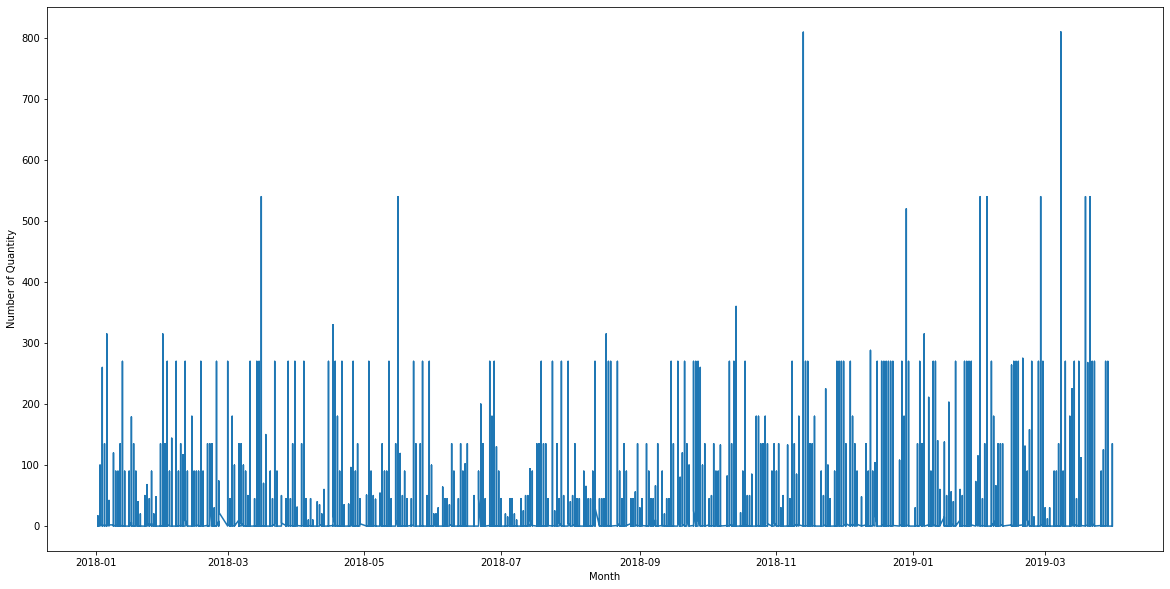

In [10]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Quantity")
plt.plot(data)

In [23]:
rolmean=data.rolling(window=365).mean()
rolstd=data.rolling(window=365).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Quantity
Month               
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
            Quantity
Month               
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN
2018-01-02       NaN


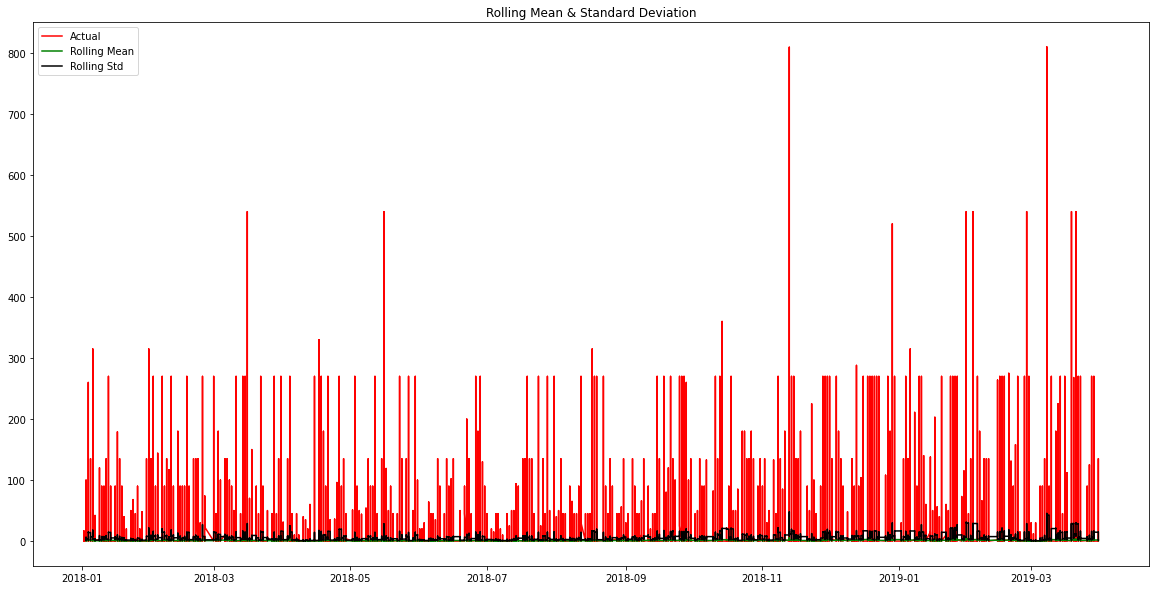

In [24]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [25]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Quantity'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 


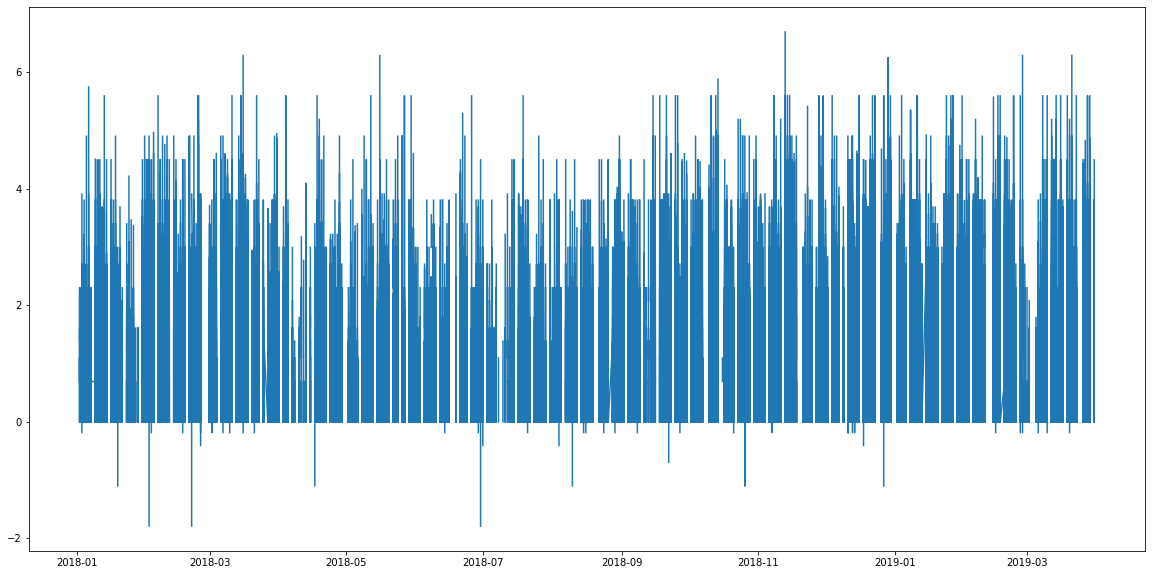

In [13]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

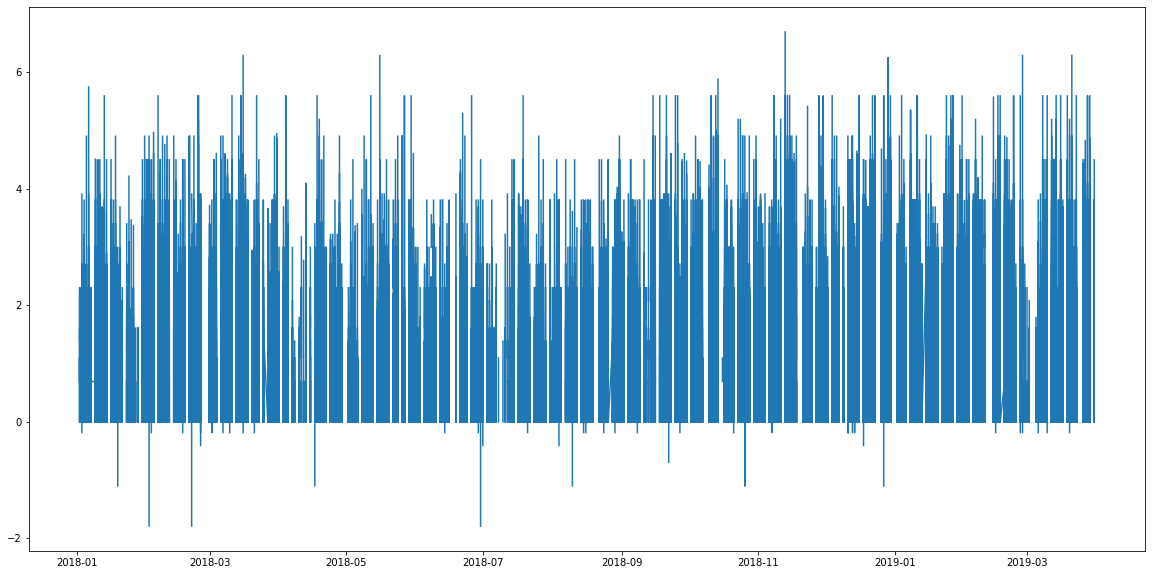

In [14]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [15]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Quantity
Month,
2018-01-02,NaN
2018-01-02,NaN
2018-01-02,NaN
2018-01-02,NaN
2018-01-02,NaN
2018-01-02,NaN
2018-01-02,NaN
2018-01-02,NaN
2018-01-02,NaN


In [16]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Quantity
Month,


In [21]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Quantity'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

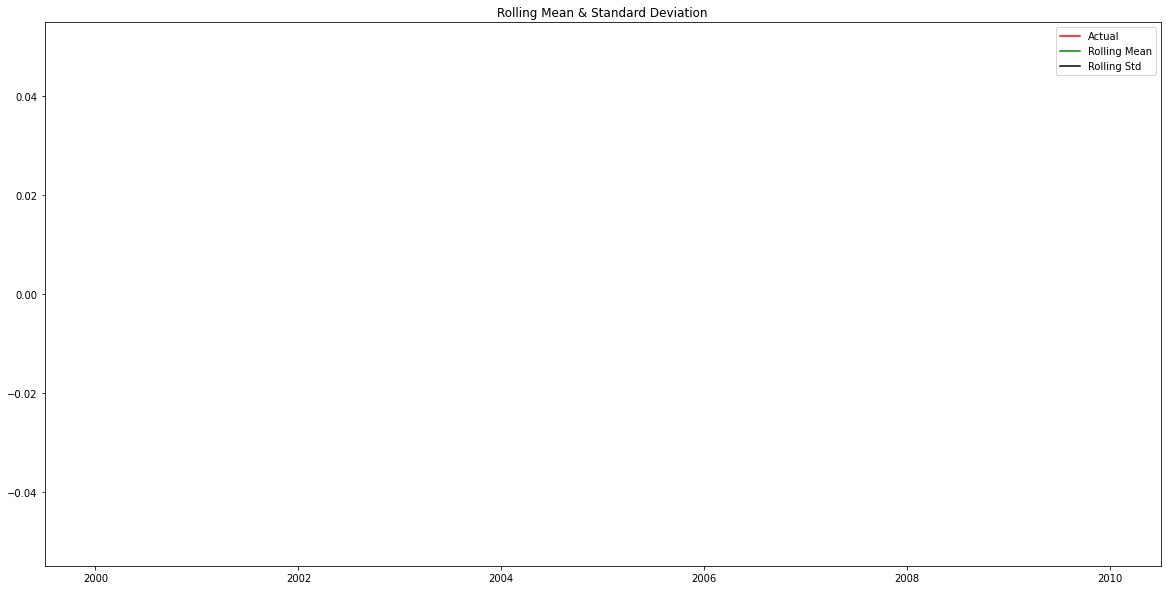

Dickey-Fuller Test: 


ValueError: sample size is too short to use selected regression component

In [22]:
stationarity(data_log_diff)

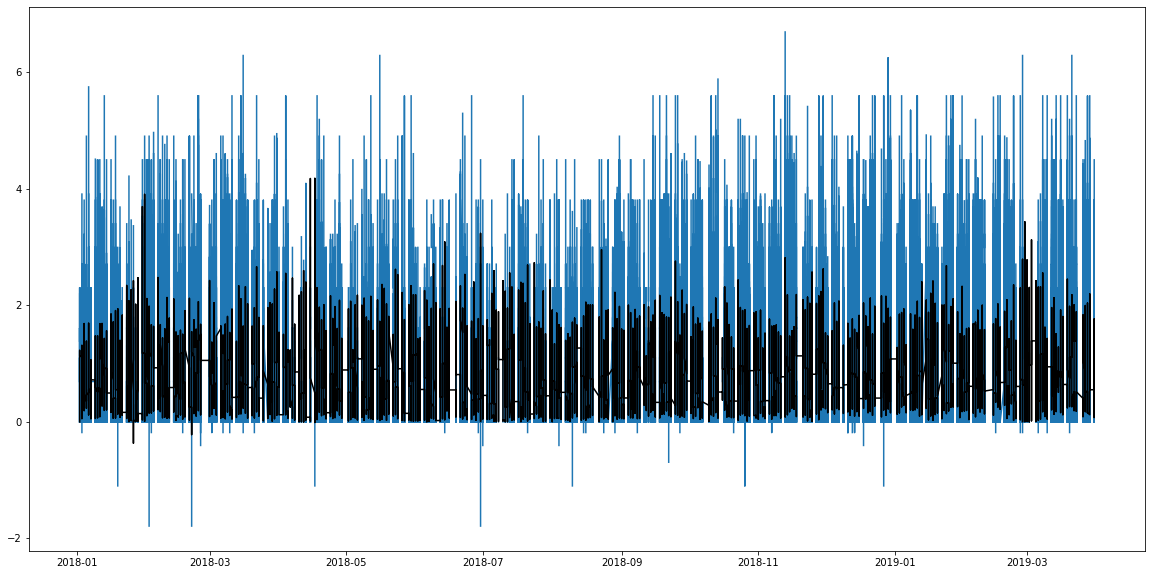

In [19]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

In [ ]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

In [ ]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

In [ ]:
data_shift=data_shift.dropna()
stationarity(data_shift)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Quantity'])**2))
print('plotting ARIMA model')

In [ ]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

In [ ]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

In [ ]:
predictions_log=pd.Series(data_log['Quantity'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

In [ ]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [ ]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [ ]:
results.forecast(steps=120)